In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from datetime import datetime
import dateutil
import requests

In [33]:
df = pd.DataFrame.from_csv('Bluetooth_Travel_Sensors_-_Individual_Address_Files__IAF_.csv')

In [34]:
riverside_df = df[df.reader_identifier.str.contains(r'ih_35_riverside')]
cesar_chavez_df = df[df.reader_identifier.str.contains(r'cesar_chavez_ih_35')]

In [35]:
bridge = riverside_df.merge(cesar_chavez_df, how='inner', on='device_address')

In [36]:
fmt = '%m/%d/%Y %I:%M:%S %p'
bridge['host_read_time_x'] = pd.to_datetime(bridge['host_read_time_x'], format = fmt)
bridge['host_read_time_y'] = pd.to_datetime(bridge['host_read_time_y'], format = fmt)
bridge['field_device_read_time_x'] = pd.to_datetime(bridge['field_device_read_time_x'], format=fmt)
bridge['field_device_read_time_y'] = pd.to_datetime(bridge['field_device_read_time_y'], format=fmt)

In [37]:
bridge_filtered = pd.DataFrame()
devices = set(bridge['device_address'])
for device in devices:
    device_records = bridge[bridge['device_address'] == device]
    read_times_x = set(device_records['host_read_time_x'])
    for read_time in read_times_x:
        time_x_records = device_records[device_records['host_read_time_x'] == read_time]
        time_diffs = np.abs(time_x_records['host_read_time_x'] - time_x_records['host_read_time_y'])
        bridge_filtered = bridge_filtered.append(bridge.iloc[time_diffs.argmin()])

In [38]:
bridge = bridge_filtered

In [39]:
northbound = bridge[bridge['host_read_time_x'] < bridge['host_read_time_y']]
southbound = bridge[bridge['host_read_time_y'] < bridge['host_read_time_x']]

In [40]:
time_north = northbound['host_read_time_y'] - northbound['host_read_time_x']
time_south = southbound['host_read_time_x'] - southbound['host_read_time_y']

In [41]:
northbound['time_north'] = time_north
southbound['time_south'] = time_south

/home/steich/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/steich/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
print(len(northbound))
print(len(southbound))

2169
676


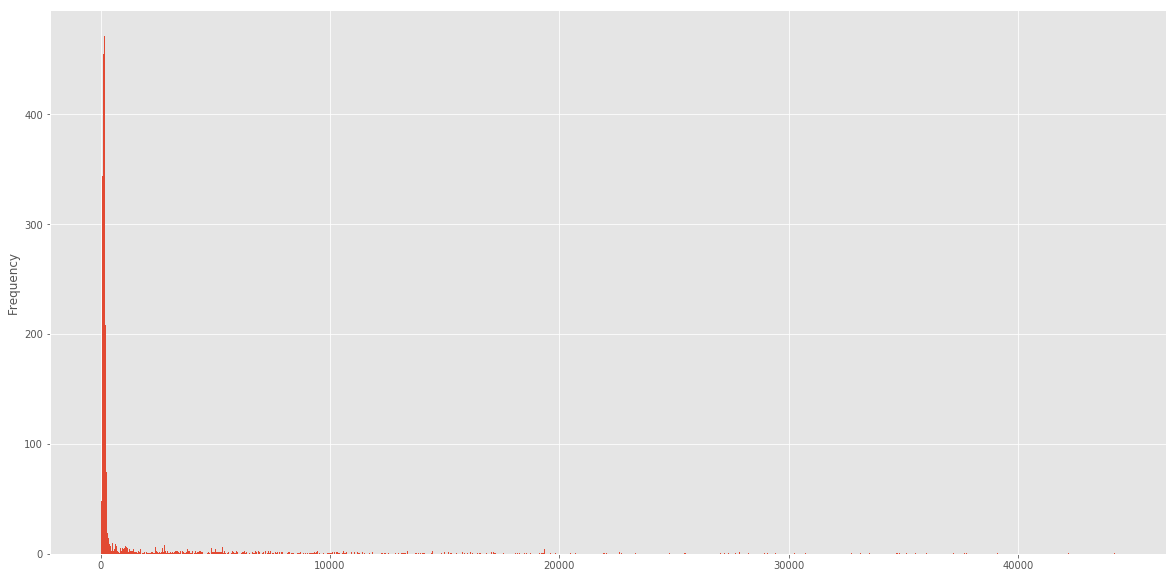

In [43]:
plt.figure(figsize=(20,10))
northbound['time_north'].astype('timedelta64[s]').plot.hist(bins=1000)

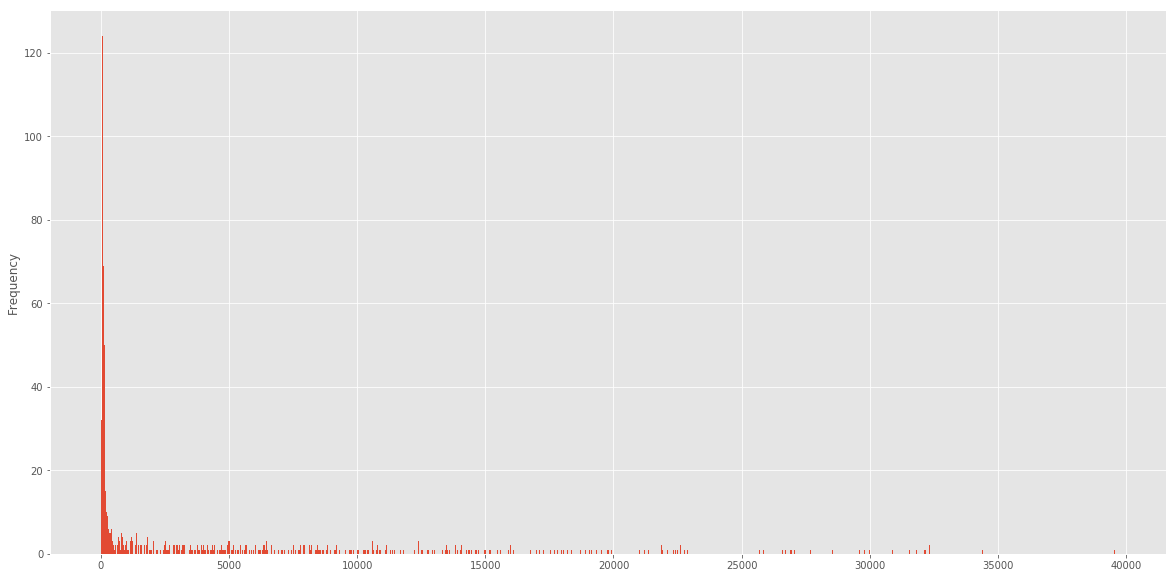

In [44]:
plt.figure(figsize=(20,10))
southbound['time_south'].astype('timedelta64[s]').plot.hist(bins=1000)

/home/steich/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


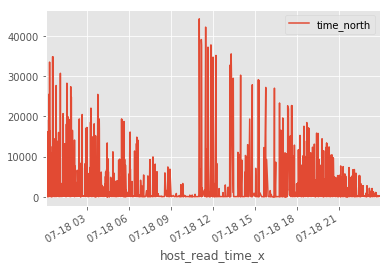

In [45]:
plt.figure(figsize=(20,10))
northbound['time_north'] = northbound['time_north'].astype('timedelta64[s]')
northbound.plot(x='host_read_time_x', y='time_north')

/home/steich/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


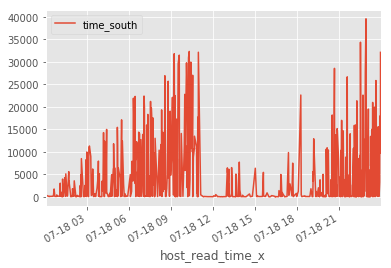

In [46]:
plt.figure(figsize=(20,10))
southbound['time_south'] = southbound['time_south'].astype('timedelta64[s]')
southbound.plot(x='host_read_time_x', y='time_south')

In [25]:
northbound

,device_address,field_device_read_time_x,field_device_read_time_y,host_read_time_x,host_read_time_y,reader_identifier_x,reader_identifier_y,time_north
9934,d1:16:47:ca:05,2016-07-18 05:02:00,2016-07-18 05:03:23,2016-07-18 05:08:06,2016-07-18 05:09:29,ih_35_riverside,cesar_chavez_ih_35,00:01:23
31187,c7:76:c4:d5:94,2016-07-18 23:41:24,2016-07-18 23:44:09,2016-07-18 23:47:28,2016-07-18 23:50:14,ih_35_riverside,cesar_chavez_ih_35,00:02:46
31188,c7:76:c4:d5:94,2016-07-18 23:42:25,2016-07-18 23:44:09,2016-07-18 23:48:30,2016-07-18 23:50:14,ih_35_riverside,cesar_chavez_ih_35,00:01:44
29551,25:08:62:ae:b6,2016-07-18 20:00:29,2016-07-18 20:03:43,2016-07-18 20:06:36,2016-07-18 20:09:50,ih_35_riverside,cesar_chavez_ih_35,00:03:14
29550,25:08:62:ae:b6,2016-07-18 14:41:50,2016-07-18 20:03:43,2016-07-18 14:47:58,2016-07-18 20:09:50,ih_35_riverside,cesar_chavez_ih_35,05:21:52
29552,25:08:62:ae:b6,2016-07-18 20:01:39,2016-07-18 20:03:43,2016-07-18 20:07:46,2016-07-18 20:09:50,ih_35_riverside,cesar_chavez_ih_35,00:02:04
29266,81:51:c7:53:e3,2016-07-18 11:05:32,2016-07-18 11:06:34,2016-07-18 11:11:37,2016-07-18 11:12:39,ih_35_riverside,cesar_chavez_ih_35,00:01:02
9463,08:75:c8:32:ac,2016-07-18 02:24:58,2016-07-18 02:27:44,2016-07-18 02:31:07,2016-07-18 02:33:53,ih_35_riverside,cesar_chavez_ih_35,00:02:46
8950,20:e5:0f:96:be,2016-07-18 00:27:56,2016-07-18 00:31:24,2016-07-18 00:34:03,2016-07-18 00:37:31,ih_35_riverside,cesar_chavez_ih_35,00:03:28
29627,35:3e:ce:74:d6,2016-07-18 22:54:03,2016-07-18 22:56:49,2016-07-18 23:00:13,2016-07-18 23:02:58,ih_35_riverside,cesar_chavez_ih_35,00:02:45
